<a id=0></a>
# 4.Categorical Plot

---
### [1.SearbornのデータセットからDataFrameを作成 ](#1)
### [2.欠損値の処理 ](#2)
### [3.欠損した年齢を考えてみる（プロットの例を示す）](#3)
### [4.カテゴリカルプロット](#4)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a id=1></a>
[Topへ](#0)

---
## 1. SearbornのデータセットからDataFrameを作成

* データセット(Titanic)を読み込む
* データセットの理解と整理、Kaggleの紹介
* 重複カラムの処理
---

データセット(Titanic)を読み込む

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

データセットの理解と整理、Kaggleの紹介

<p>
    <a href="https://www.kaggle.com/competitions/titanic/data" target="_blank" rel="noreferrer noopener">
        Kaggle Dataset Titanic のページへ
    </a>
</p>

    survival : Survival	0 = No, 1 = Yes  
    pclass   : Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  
    sex	  : Sex	  
    age      : Age in years  	
    sibsp    : # of siblings / spouses aboard the Titanic  (兄弟姉妹 / 配偶者)  
    parch    : # of parents / children aboard the Titanic	(親 / 子)  
    fare     : Passenger fare	
    embarked : Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  
    who      : man or female or child
    class, who, adult_male, deck, embark_town, alive, alone
    ※ 一部変更しています

In [3]:
df = sns.load_dataset(name="titanic")

重複カラムの処理（'alive', 'class', 'adult_male', 'embark_town', 'alone'）

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df["survived"].unique(), df["alive"].unique()

(array([0, 1], dtype=int64), array(['no', 'yes'], dtype=object))

In [6]:
df[["survived", "alive"]].value_counts()

survived  alive
0         no       549
1         yes      342
Name: count, dtype: int64

In [7]:
df[["pclass", "class"]].value_counts()

pclass  class 
3       Third     491
1       First     216
2       Second    184
Name: count, dtype: int64

In [8]:
df[["embarked", "embark_town"]].value_counts()

embarked  embark_town
S         Southampton    644
C         Cherbourg      168
Q         Queenstown      77
Name: count, dtype: int64

In [9]:
df[["who", "adult_male"]].value_counts()

who    adult_male
man    True          537
woman  False         271
child  False          83
Name: count, dtype: int64

In [10]:
df[(df["sibsp"] == 0) & (df["parch"] == 0)]["alone"].unique()

array([ True])

In [11]:
df[(df["sibsp"] != 0) | (df["parch"] != 0)]["alone"].unique()


array([False])

<p>
    'alive', 'class', 'adult_male', 'embark_town', 'alone' のカラムを削除 
    </p>

In [12]:
df.drop(columns=["alive", "class", "adult_male", "embark_town", "alone"], inplace=True)

In [13]:
df.shape

(891, 10)

---
<a id=2></a>
[Topへ](#0)

---
## 2. 欠損値の処理

* 欠損値の確認
* 欠損値の処理('deck')
* 欠損値の処理('embarked')：予測を試みる
---

欠損値の確認

In [14]:
df.isnull().sum(axis=0)

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
dtype: int64

欠損値の処理('deck')

In [15]:
df["deck"].value_counts().sort_index()

deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
Name: count, dtype: int64

In [16]:
df.groupby("deck")["survived"].describe()

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,0.466667,0.516398,0.0,0.00,0.0,1.0,1.0
B,47.0,0.744681,0.440755,0.0,0.50,1.0,1.0,1.0
C,59.0,0.593220,0.495450,0.0,0.00,1.0,1.0,1.0
D,33.0,0.757576,0.435194,0.0,1.00,1.0,1.0,1.0
E,32.0,0.750000,0.439941,0.0,0.75,1.0,1.0,1.0
F,13.0,0.615385,0.506370,0.0,0.00,1.0,1.0,1.0
G,4.0,0.500000,0.577350,0.0,0.00,0.5,1.0,1.0


In [17]:
df.drop(columns=["deck"], inplace=True)

In [18]:
df.shape

(891, 9)

欠損値の処理('embarked')：予測を試みる

In [22]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [24]:
df.groupby("embarked")["survived"].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


In [34]:
vc1 = df[(df.pclass==1)&(df.sex=="female")&
         (df.sibsp==0)&(df.parch==0)].embarked.value_counts()
vc1

embarked
C    18
S    14
Name: count, dtype: int64

In [35]:
vc2 = df.embarked.value_counts()[[1, 0]]
vc2

embarked
C    168
S    644
Name: count, dtype: int64

In [36]:
vc1 / vc2

embarked
C    0.107143
S    0.021739
Name: count, dtype: float64

In [41]:
df[df.sex == "female"].groupby("embarked")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,61.0,28.344262,15.770830,0.75,17.0,24.0,40.000,60.0
Q,12.0,24.291667,8.147667,15.00,17.5,21.5,30.875,39.0
S,186.0,27.771505,13.690703,1.00,19.0,27.0,36.000,63.0


In [49]:
df[df["embarked"].isnull()].index

Index([61, 829], dtype='int64')

In [50]:
df.loc[df[df["embarked"].isnull()].index, "embarked"] = "C"

In [54]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
who           0
dtype: int64

---
<a id=3></a>
[Topへ](#0)

---
## 3. 欠損した年齢を考えてみる（プロットの例を示す）

* 年齢を確認
* 年齢の分布
    * **sns.histplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.histplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.histplot のページへ
        </a>
    </p>


* 'age'と'pclass'の関係
* 'age'と'sex'の関係
* 相関関係（correlation）
    * **sns.heatmap()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank" rel="noreferrer noopener">
            Seaborn.heatmap のページへ
        </a>
    </p>


* 個別の予測は困難であり、Seabornの学習がメインのため、レコードをすべて削除する
* CSVファイルとして保存する

---

年齢を確認

In [55]:
df[df.age.isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
5,0,3,male,NaN,0,0,8.4583,Q,man
17,1,2,male,NaN,0,0,13.0000,S,man
19,1,3,female,NaN,0,0,7.2250,C,woman
26,0,3,male,NaN,0,0,7.2250,C,man
28,1,3,female,NaN,0,0,7.8792,Q,woman


In [56]:
# childがある
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [58]:
# 年齢が欠損しているデータ内にchildはない
df[df.age.isnull()].who.unique()

array(['man', 'woman'], dtype=object)

In [60]:
df[df.who=="child"].age.max()

15.0

In [61]:
df_adult = df[15 < df.age]
df_adult.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
518,1,2,female,36.0,1,0,26.000,S,woman
320,0,3,male,22.0,0,0,7.250,S,man
754,1,2,female,48.0,1,2,65.000,S,woman
579,1,3,male,32.0,0,0,7.925,S,man
385,0,2,male,18.0,0,0,73.500,S,man


年齢の分布

In [62]:
df_adult.age.describe()

count    631.000000
mean      32.767829
std       12.440732
min       16.000000
25%       23.000000
50%       30.000000
75%       40.000000
max       80.000000
Name: age, dtype: float64

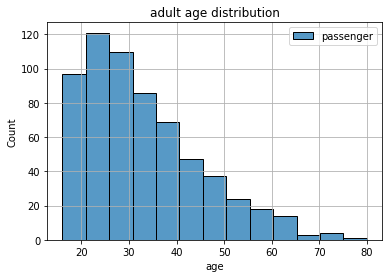

In [76]:
sns.histplot(data=df_adult, x="age", bins=13, label="passenger")
plt.title("adult age distribution")
plt.legend()
plt.grid()
plt.show()

'age'と'pclass'の関係

In [77]:
df.groupby("pclass").age.describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


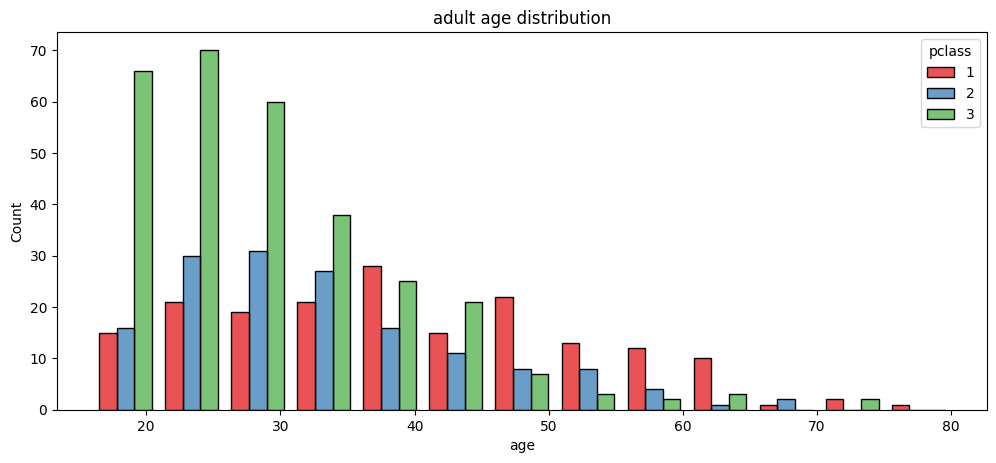

In [89]:
plt.figure(figsize=(12, 5), dpi=100)
sns.histplot(data=df_adult, x="age", bins=13, hue="pclass", 
             palette='Set1', multiple="dodge", shrink=0.8)

plt.title("adult age distribution")
plt.show()

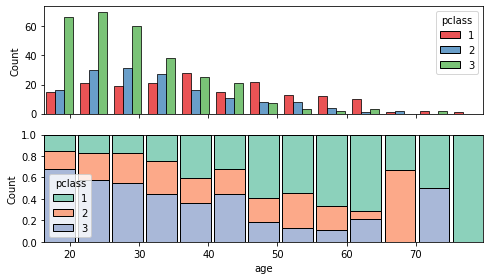

In [91]:
fig, ax = plt.subplots(2, 1, figsize=(7, 4), tight_layout=True, sharex=True)
sns.histplot(data=df_adult, x="age", bins=13, hue="pclass", 
             palette='Set1', multiple="dodge", shrink=0.8, ax=ax[0])
sns.histplot(data=df_adult, x="age", bins=13, hue="pclass", 
             palette='Set2', multiple="fill", shrink=0.9, ax=ax[1])

plt.show()

In [94]:
# 若いほどpclassが3, 年を取るほど1に近づく

'age'と'sex'の関係

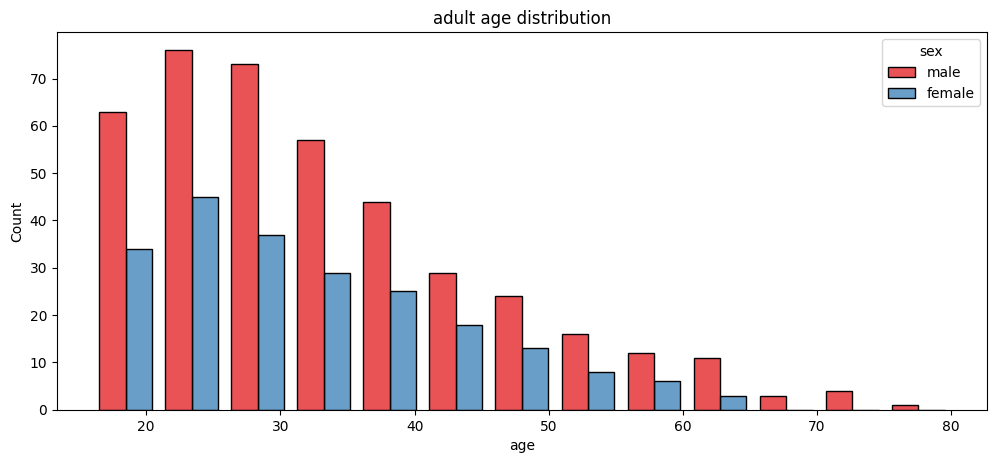

In [92]:
plt.figure(figsize=(12, 5), dpi=100)
sns.histplot(data=df_adult, x="age", bins=13, hue="sex", 
             palette='Set1', multiple="dodge", shrink=0.8)

plt.title("adult age distribution")
plt.show()

In [93]:
# 傾向はなさそう

相関関係

In [98]:
df_adult.loc[:, ["survived", "pclass", "age", "sibsp", "parch", "fare"]].corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.390467,0.010352,0.088154,0.074216,0.296918
pclass,-0.390467,1.000000,-0.355523,-0.111805,-0.024458,-0.552295
age,0.010352,-0.355523,1.000000,-0.050841,0.037404,0.110403
sibsp,0.088154,-0.111805,-0.050841,1.000000,0.280791,0.221493
parch,0.074216,-0.024458,0.037404,0.280791,1.000000,0.217429
fare,0.296918,-0.552295,0.110403,0.221493,0.217429,1.000000


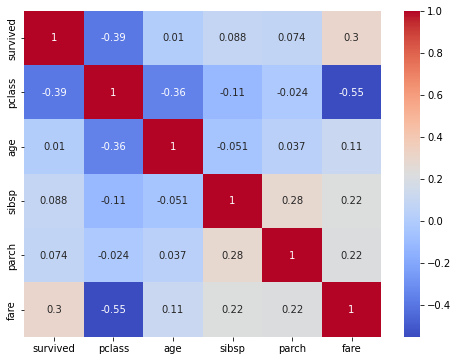

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_adult.loc[:, ["survived", "pclass", "age", "sibsp", "parch", "fare"]].corr(),
            annot=True, cmap="coolwarm")
plt.show()

個別の予測は困難であり、Seabornの学習がメインのため、レコードをすべて削除する

In [101]:
df.dropna(axis=0, inplace=True)

In [102]:
df.shape

(714, 9)

In [104]:
df.isnull().sum().sum()

0

CSVファイルとして保存する

In [105]:
df.to_csv("./data/titanic_non_null.csv", index=False)

---
<a id=4></a>
[Topへ](#0)

---
## 4. カテゴリカルプロット

* キャットプロットとストリッププロット
 * **sns.catplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.catplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.catplot のページへ
        </a>
    </p>
    

* カウントプロット
    * **sns.countplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.countplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.countplot のページへ
        </a>
    </p>


* バープロット
 * **sns.barplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.barplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.barplot のページへ
        </a>
    </p>


* ボックスプロット
 * **sns.boxplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.boxplot のページへ
        </a>
    </p>
    

* バイオリンプロット
 * **sns.violinplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.violinplot のページへ
        </a>
    </p>
    
    
* スウォームプロット
 * **sns.swarmplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.swarmplot のページへ
        </a>
    </p>
    


---

キャットプロットとストリッププロット

カウントプロット

バープロット

ボックスプロット

バイオリンプロット

スウォームプロット

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---